In [27]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [1083]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


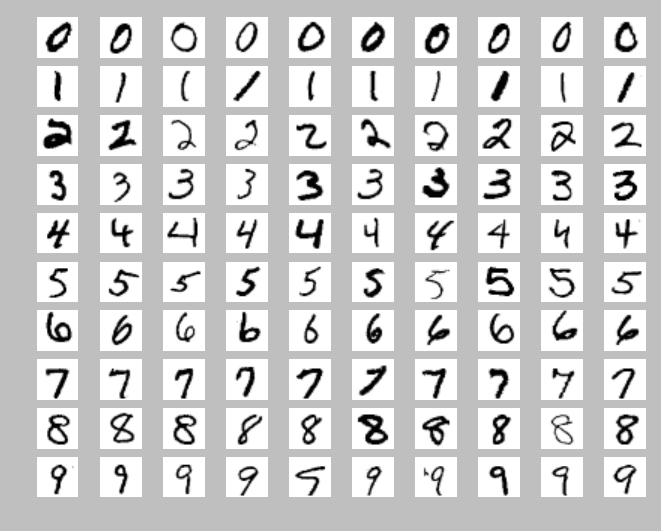

In [1159]:
#def P1(num_examples=10):

### STUDENT START ###

# create a shortcut for the labels
labels = mini_train_labels

# define a function 'sorter' that takes a certain number as an argument,
# checks if the label at index 'i' matches the number called from the data,
# reshapes the grayscale values for each image from an array into a 28x28 matrix
# and appends each relevant number to the 'group' list and returns that list
def sorter(data, label, num):
    group = []
    count = 0
    while count <= 9:
        for i in range(0,len(mini_train_data)):
            if label[i] == num:
                group.append(np.array(mini_train_data[i]).reshape((28,28)))
                count += 1
    return group

# running the sorter function for numbers 0 through 9
zero = sorter(mini_train_data, labels, 0)
one = sorter(mini_train_data, labels, 1)
two = sorter(mini_train_data, labels, 2)
three = sorter(mini_train_data, labels, 3)
four = sorter(mini_train_data, labels, 4)
five = sorter(mini_train_data, labels, 5)
six = sorter(mini_train_data, labels, 6)
seven = sorter(mini_train_data, labels, 7)
eight = sorter(mini_train_data, labels, 8)
nine = sorter(mini_train_data, labels, 9)

# creates variable 'wholeset' that has the whole array of the grayscale matrices
# for each number category at each index of the 'wholeset' array
wholeset = [zero,one,two,three,four,five,six,seven,eight,nine]

# array with the lengths of each number subset
counter = [len(zero),len(one),len(two),len(three),len(four),len(five),len(six),len(seven),len(eight),len(nine)]

# want to have random assignment of images to the final set
import random

# for each index in the 'wholset' array, selects 10 random integers within
# the length of each individual number array, and then appends the image matrix 
# at each of those indices to a final list. Does this for each number category.
def selector(num, ct):
    total = []
    for i in range(0,10):
        for j in range(0,10):
            x = random.randint(0,ct[i]-1)
            total.append(num[i][x])
    return total

finalset = selector(wholeset,counter)

# creates the 10x10 grid to visualize the numbers
# sets greyscale, and removes the axis
def tenbyten(num):
    for i in range(0,len(num)):
        plt.subplot(10, 10, i+1)
        plt.axis('off')
        plt.imshow(num[i], cmap = 'Greys')

tenbyten(finalset)

### STUDENT END ###

#P1(10)

In [599]:
#def P2(k_values):

### STUDENT START ###

# define function for running KNN with different values of k
# P2(training_data, training_labels, dev_data, dev_labels, k_value)
# error rate = wrong labels / total number of predictions
def P2(k_value):
    model = KNeighborsClassifier(n_neighbors=k_value)
    model.fit(mini_train_data, labels)
    test_predicted_labels = model.predict(dev_data)
    wrong_prediction = (test_predicted_labels != dev_labels)
    err_rate = np.sum(wrong_prediction)/float(len(wrong_prediction))
    print 'error rate of predictions (k = %d):' % k_value, err_rate*100,'%'
    return test_predicted_labels

# reporting accuracy for k = [1,3,5,7,9] on the development set
k1 = P2(1)
k3 = P2(3)
k5 = P2(5)
k7 = P2(7)
k9 = P2(9)

print("\n")
# report on precision, recall and F1 for k=1
report_k1= classification_report(dev_labels, k1, 
                                 target_names=['zero','one','two','three','four',
                                               'five','six','seven','eight','nine'])  
print report_k1

print "ANSWER: The most difficult digit is '9', with an F1-score of just .77"

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]

#P2(k_values)

error rate of predictions (k = 1): 13.4 %
error rate of predictions (k = 3): 13.3 %
error rate of predictions (k = 5): 14.3 %
error rate of predictions (k = 7): 14.4 %
error rate of predictions (k = 9): 14.5 %


             precision    recall  f1-score   support

       zero       0.92      0.93      0.93       102
        one       0.83      0.99      0.91       107
        two       0.96      0.82      0.88        83
      three       0.86      0.85      0.85       105
       four       0.89      0.86      0.88        99
       five       0.87      0.80      0.83        83
        six       0.90      0.96      0.93       109
      seven       0.85      0.85      0.85       113
      eight       0.88      0.77      0.82        99
       nine       0.74      0.80      0.77       100

avg / total       0.87      0.87      0.87      1000



TypeError: string indices must be integers, not tuple

In [614]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

# function that times prediction, and returns a KNN model for different training sizes
def P3(train_size, k_value):
    time1 = time.time() # start timer
    model = KNeighborsClassifier(n_neighbors=k_value)
    train_data_n = [] # will put the randomly selected training data here
    train_label_n = [] # list for corresponding training labels
    for i in range(0,train_size):
        x = random.randint(0,len(train_data)-1) # generate a random number for training data index
        train_data_n.append(train_data[x]) # adds the training data instance at 'x' index to the list
        train_label_n.append(train_labels[x]) # corresponding label
    model.fit(train_data_n, train_label_n) # fits the model to the new size of training data
    test_predicted_labels = model.predict(dev_data)
    wrong_prediction = (test_predicted_labels != dev_labels)
    accuracy = 1 - np.sum(wrong_prediction)/float(len(wrong_prediction)) # accuracy = 1 - error rate
    time2 = time.time() # stop timer
    total_time = float(time2) - float(time1)
    print 'accuracy of predictions (training size = %d):' % train_size, accuracy*100,'%'
    print 'KNN with training set size: %d' % train_size,'took %d seconds for prediction\n' % total_time
    return accuracy
    
k1_100 = P3(100,1)
k1_200 = P3(200,1)
k1_400 = P3(400,1)
k1_800 = P3(800,1)
k1_1600 = P3(1600,1)
k1_3200 = P3(3200,1)
k1_6400 = P3(6400,1)
k1_12800 = P3(12800,1)
k1_25000 = P3(25000,1)
### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

accuracy of predictions (training size = 100): 67.8 %
KNN with training set size: 100 took 0 seconds for prediction

accuracy of predictions (training size = 200): 77.0 %
KNN with training set size: 200 took 0 seconds for prediction

accuracy of predictions (training size = 400): 82.7 %
KNN with training set size: 400 took 0 seconds for prediction

accuracy of predictions (training size = 800): 87.6 %
KNN with training set size: 800 took 0 seconds for prediction

accuracy of predictions (training size = 1600): 90.8 %
KNN with training set size: 1600 took 1 seconds for prediction

accuracy of predictions (training size = 3200): 92.8 %
KNN with training set size: 3200 took 3 seconds for prediction

accuracy of predictions (training size = 6400): 94.2 %
KNN with training set size: 6400 took 7 seconds for prediction

accuracy of predictions (training size = 12800): 95.5 %
KNN with training set size: 12800 took 15 seconds for prediction

accuracy of predictions (training size = 25000): 96.0

NameError: name 'k1_300' is not defined

predicted accuracy is 125.173613 %

ANSWER: The problem with basic linear regression is that it
        doesn't account for the diminishing improvements in prediction
        accuracy as you add more and more training data. The upper limit
        of accuracy is 1, but a linear slope means y will continue to 
        increase at a constant rate for as long as the size of x increases.
        We can illustrate this by plotting the train_sizes against accuracies
        and seeing the asymptote at 100% accuracy (below)

new predicted accuracy is 104.344114 %


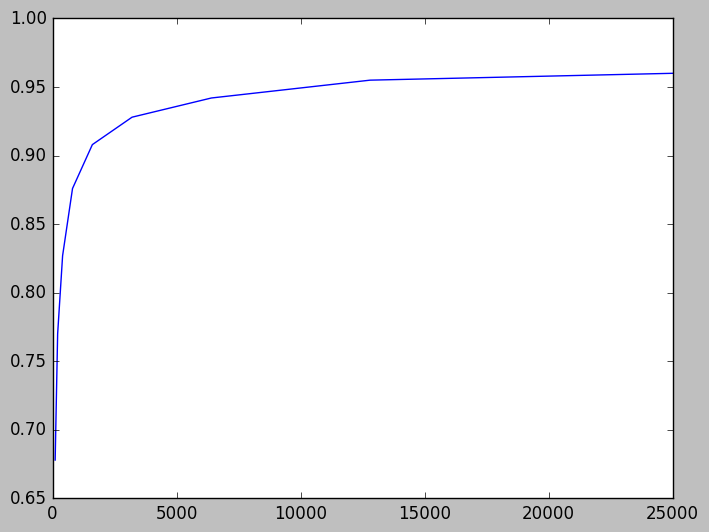

In [728]:
#def P4():

### STUDENT START ###
# array of training sizes looked at, and the corresponding accuracies
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = [k1_100, k1_200, k1_400, k1_800, k1_1600, k1_3200, k1_6400, k1_12800, k1_25000]

# reshape the training sizes into a matrix
reshape_x = np.array(train_sizes).reshape(9,1)

# set class instance and fit the regression on x and y variables
linreg = LinearRegression()
linreg.fit(reshape_x,accuracies)

# define slope and intercept coefficients
beta1 = linreg.coef_[0]
beta0 = linreg.intercept_

# run the regression using a training set of 60,000
predict_60000 = beta0 + beta1*60000
print 'predicted accuracy is %f' % (predict_60000*100),'%'

print """\nANSWER: The problem with basic linear regression is that it
        doesn't account for the diminishing improvements in prediction
        accuracy as you add more and more training data. The upper limit
        of accuracy is 1, but a linear slope means y will continue to 
        increase at a constant rate for as long as the size of x increases.
        We can illustrate this by plotting the train_sizes against accuracies
        and seeing the asymptote at 100% accuracy (below)"""

# plot the shape of the data
plt.plot(train_sizes, accuracies)

# performing a log transformation on x to account for the diminishing improvements 
import math
def logger(array):
    log_val = []
    for i in range(0,len(array)):
        x = math.log(float(train_sizes[i]))
        log_val.append(x)
    return log_val

# new array for the log of training sizes
log_size = logger(train_sizes)
log_size

# reshape into matrix
reshape_logx = np.array(log_size).reshape(9,1)

# new regression model on log(x)
tformreg = LinearRegression()
tformreg.fit(reshape_logx,accuracies)

log_beta1 = tformreg.coef_[0]
log_beta0 = tformreg.intercept_

# calculate predicted accuracy for x = 60,000 
# prediction value is much more reasonable, although still too high
log_predict_60000 = log_beta0 + log_beta1*math.log(60000)
print '\nnew predicted accuracy is %f' % (log_predict_60000*100),'%'
### STUDENT END ###

#P4()

error rate of predictions (k = 1): 13.4 %
[[ 95   0   0   0   0   1   3   0   3   0]
 [  0 106   0   1   0   0   0   0   0   0]
 [  2   4  68   1   1   0   0   4   1   2]
 [  1   2   1  89   0   4   0   2   4   2]
 [  0   1   0   0  85   0   2   1   0  10]
 [  2   2   0   6   1  66   3   0   1   2]
 [  3   0   0   0   1   0 105   0   0   0]
 [  0   5   1   0   0   0   0  96   0  11]
 [  0   6   1   6   0   5   3   1  76   1]
 [  0   1   0   1   7   0   1   9   1  80]]

ANSWER: The confusion matrix shows that 7 is often mislabeled as 9,
        4 is often mislabeled as 9, and vice versa.  8 also gets confused with 
        a lot of numbers, such as 1, 3 and 5.

Incorrectly predicted labels for the images below:
[[ 7.  8.  7.  9.  1.]
 [ 1.  5.  9.  1.  7.]
 [ 1.  4.  9.  3.  5.]
 [ 1.  4.  6.  3.  4.]
 [ 1.  6.  9.  1.  7.]]


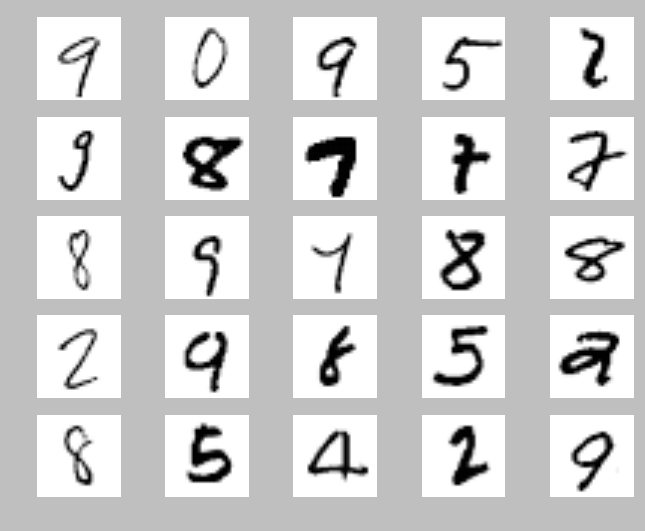

In [791]:
#def P5():

### STUDENT START ###

# run 1-NN function from P2 again and assign new variable
p5_k1 = P2(1)

# generate the confusion matrix
p5_confuse = confusion_matrix(dev_labels, p5_k1)
print p5_confuse

print """\nANSWER: The confusion matrix shows that 7 is often mislabeled as 9,
        4 is often mislabeled as 9, and vice versa.  8 also gets confused with 
        a lot of numbers, such as 1, 3 and 5.\n"""

# reshape the development data to be able to display images
def reshape(data):
    dev_shaped = []
    for i in range(0,len(data)):
        dev_shaped.append(np.array(data[i]).reshape((28,28)))
    return dev_shaped

dev_shaped = reshape(dev_data)

# degine function to display 5x5 grid of mislabeled digits in dev_data
def confuse(data, true, pred):
    pred_error = []
    count = 1
    for i in range(0,len(true)):
        if true[i] != pred[i]:    
            if count <= 25: # limit the examples to 25
                plt.subplot(5,5,count) # set subplot grid
                plt.axis('off') # turn of axis labels
                plt.imshow(data[i], cmap = 'Greys')
                pred_error.append(pred[i]) # add each predicted label to list
                count += 1
            else:
                break
    x = np.array(pred_error).reshape((5,5)) # reshape the predict label list
    print "Incorrectly predicted labels for the images below:\n",x

confuse(dev_shaped, dev_labels, p5_k1)

### STUDENT END ###

#P5()

In [908]:
#def P6():
    
### STUDENT START ###
def blur(data):
    blurred = []
    for i in range(0,len(data)):
        for j in range(1,27):
            for k in range(1,27):
                data[i][j,k] = (data[i][j-1,k-1] + data[i][j,k-1] + data[i][j+1,k-1]
                + data[i][j-1,k] + data[i][j,k] + data[i][j+1,k]
                + data[i][j-1,k+1] + data[i][j,k+1] + data[i][j+1,k+1])/9
        blurred.append(data[i])
    return blurred

mini_shaped = reshape(mini_train_data)
mini_blur = blur(mini_shaped)

dev_shaped = reshape(dev_data)
dev_blur = blur(dev_shaped)

def unshape(data):
    dev_flat = []
    for i in range(0,len(data)):
        dev_flat.append(np.reshape(data[i],784))
    return dev_flat

mini_blur_array = unshape(mini_blur)
dev_blur_array = unshape(dev_blur)

def P6(pred, dev, k_value):
    model = KNeighborsClassifier(n_neighbors=k_value)
    model.fit(pred, mini_train_labels)
    test_predicted_labels = model.predict(dev)
    wrong_prediction = (test_predicted_labels != dev_labels)
    accuracy = 1- np.sum(wrong_prediction)/float(len(wrong_prediction))
    print 'accuracy of predictions (k = %d):' % k_value, accuracy*100,'%'
    return test_predicted_labels

print "\nBlurred training data and normal dev data:"
blur_test1 = P6(mini_blur_array, dev_data, 1)
print "\nNormal training data and blurred dev data:"
blur_test2 = P6(mini_train_data,dev_blur_array, 1)
print "\nBlurred training data and blurred dev data:"
blur_test3 = P6(mini_blur_array, dev_blur_array, 1)

print """\nANSWER: Blurring the images in either just the training set or both 
        the training and development sets appears to improve the prediction accuracy, 
        from an 86.6% baseline to 89.2% and 90.4%, respectively"""
### STUDENT END ###

#P6()


Blurred training data and normal dev data:
accuracy of predictions (k = 1): 89.2 %

Normal training data and blurred dev data:
accuracy of predictions (k = 1): 86.2 %

Blurred training data and blurred dev data:
accuracy of predictions (k = 1): 90.4 %
accuracy of predictions (k = 1): 86.6 %


In [1090]:
#def P7():

### STUDENT START ###
# 0 will mean shading value < 0.5
def binarize(data):
    # initialize a new pixel array with all zeros
    binarized_data = np.zeros(data.shape)

    # check each pixel against the shading threshold
    for i in range(0,len(data)):
        for pixel in range(data.shape[1]):
            binarized_data[i][pixel] = data[i][pixel] >= 0.5
    return binarized_data

# create binarized training data
mini_binary = binarize(mini_train_data)
dev_binary = binarize(dev_data)

# implement sklearn's BernoulliNB model
alpha = 1
nbmodel = BernoulliNB(alpha=alpha)
nbmodel.fit(mini_binary,mini_train_labels)
print 'Binary model accuracy: %3.2f' %nbmodel.score(dev_binary, dev_labels)

# initiate multinomial model with values for white, grey and black
def multirize(data):
    multirized_data = np.zeros(data.shape)
    
    for i in range(0,len(data)):
        for pixel in range(data.shape[1]):
            if data[i][pixel] >= 0.33 and data[i][pixel] <= 0.66:
                multirized_data[i][pixel] = 1
            elif data[i][pixel] > 0.66:
                multirized_data[i][pixel] = 2
    return multirized_data

# create multivariate training data
mini_multi = multirize(mini_train_data)
dev_multi = multirize(dev_data)

# fit the model and return the accuracy
alpha = 1
multinb = MultinomialNB(alpha=alpha)
multinb.fit(mini_multi, mini_train_labels)
print 'Multinomial model accuracy: %3.2f' % multinb.score(dev_multi, dev_labels)

print """\nANSWER: The Multinomial model does not improve the accuracy of the model.
        This is probably because with number images, the addition of a broad 'grey' 
        shading acts to disrupt some of the edges, and provides a space for different
        numbers to have more overlap. However, the effect appears to be minimal.\n"""

### STUDENT END ###

#P7()

Binary model accuracy: 0.81
Multinomial model accuracy: 0.81

ANSWER: The Multinomial model does not improve the accuracy of the model.
        This is probably because with number images, the addition of a broad 'grey' 
        shading acts to disrupt some of the edges, and provides a space for different
        numbers to have more overlap. However, the effect appears to be minimal.



In [1091]:
#def P8(alphas):

### STUDENT START ###
# list of alpha levels for GridSearchCV to utilize
alphas = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
grid_alpha = GridSearchCV(estimator=newmodel, param_grid=dict(alpha=alphas))

# fit the grid model
grid_alpha.fit(mini_binary,mini_train_labels)
print 'Grid model accuracy at best alpha: %3.2f' %grid_alpha.score(dev_binary, dev_labels)

print'\nThe best value for alpha is: %3.4f' % grid_alpha.best_estimator_.alpha
print '\n'
print (grid_alpha.grid_scores_)


print """\nANSWER: The best value for alpha is 0.0001, with a prediction accuracy of 0.82.
        The prediction accuracy when alpha = 0 is just 0.098.  This is not what I expected
        but might be explained by the use of binary data, which doesn't smooth well."""
### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

Grid model accuracy at best alpha: 0.82

The best value for alpha is: 0.0001


[mean: 0.09700, std: 0.00075, params: {'alpha': 0.0}, mean: 0.81300, std: 0.02487, params: {'alpha': 0.0001}, mean: 0.81100, std: 0.02057, params: {'alpha': 0.001}, mean: 0.81200, std: 0.01464, params: {'alpha': 0.01}, mean: 0.80600, std: 0.01675, params: {'alpha': 0.1}, mean: 0.80800, std: 0.01673, params: {'alpha': 0.5}, mean: 0.80200, std: 0.01573, params: {'alpha': 1.0}, mean: 0.79500, std: 0.01366, params: {'alpha': 2.0}, mean: 0.72300, std: 0.00973, params: {'alpha': 10.0}]

ANSWER: The best value for alpha is 0.0001, with a prediction accuracy of 0.82.
        The prediction accuracy when alpha = 0 is just 0.098.  This is not what I expected
        but might be explained by the use of binary data, which doesn't smooth well.


In [1086]:
#def P9():

### STUDENT END ###
# implement GaussianNB model
gmodel = GaussianNB()
gmodel.fit(mini_train_data, mini_train_labels).predict(dev_data)
print 'Gaussian model accuracy: %3.2f' %gmodel.score(dev_data, dev_labels)

print gmodel.theta_
print gmodel.sigma_

print """\nANSWER: The GaussianNB predictor does poorly because it assumes the
        features have a normal (Gaussian) distribution, whereas the pixels are 
        predominantly white, with minimal variation between the values > 0.
        
        In order to get closer to the BernoulliNB accuracy, you could use a 
        sparse matrix for the image, with only pixels with value > 0."""

### STUDENT END ###

#gnb = P9()

Gaussian model accuracy: 0.63
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[  2.04380534e-10   2.04380534e-10   2.04380534e-10 ...,   2.04380534e-10
    2.04380534e-10   2.04380534e-10]
 [  2.04380534e-10   2.04380534e-10   2.04380534e-10 ...,   2.04380534e-10
    2.04380534e-10   2.04380534e-10]
 [  2.04380534e-10   2.04380534e-10   2.04380534e-10 ...,   2.04380534e-10
    2.04380534e-10   2.04380534e-10]
 ..., 
 [  2.04380534e-10   2.04380534e-10   2.04380534e-10 ...,   2.04380534e-10
    2.04380534e-10   2.04380534e-10]
 [  2.04380534e-10   2.04380534e-10   2.04380534e-10 ...,   2.04380534e-10
    2.04380534e-10   2.04380534e-10]
 [  2.04380534e-10   2.04380534e-10   2.04380534e-10 ...,   2.04380534e-10
    2.04380534e-10   2.04380534e-10]]

ANSWER: The GaussianNB predictor does poorly because it assumes the
        features have

Generator model accuracy at best alpha: 0.82

ANSWER: The generated digits are all pretty recognizeable,
        although they do have slight variations.  The biggest difference
        between these and the training digits is that the generated digits
        are a lot fuzzier, and the edges are not as well defined.


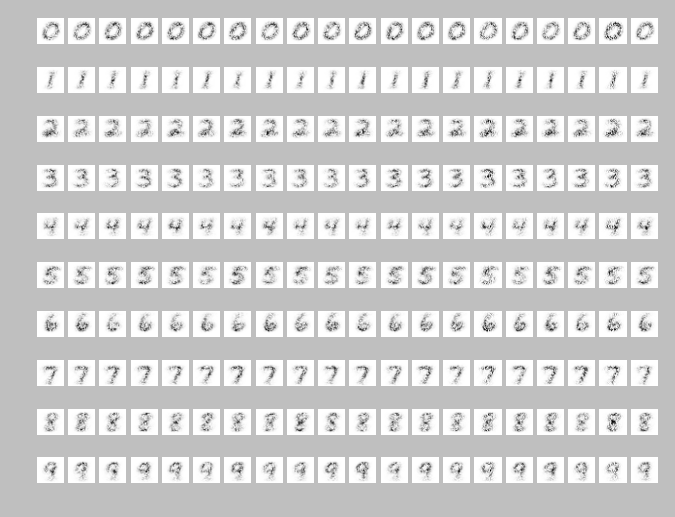

In [1176]:
#def P10(num_examples):

### STUDENT START ###
#train_binary = binarize(train_data)

# implement sklearn's BernoulliNB model
gen = BernoulliNB(alpha=0.0001)
gen.fit(mini_binary,mini_train_labels)
print 'Generator model accuracy at best alpha: %3.2f' %gen.score(dev_binary, dev_labels)

# initiate function to generate an array of 28x28 matrices containing random
# numbers from a uniform distribution
def randomizer(len):
    outputs = []
    for i in range(0,len):
        outputs.append(np.random.rand(28,28))
    return outputs

# create an array of 200 random matrices
rando200 = randomizer(200)
        
# captures the actual probabilities of shading from the BernoulliNB model
# corresponding with each digit classification
# then reshapes into 10 individual 28x28 matrices
probs = np.exp(gen.feature_log_prob_)
shape_probs = reshape(probs)

# function to populate an array of 200 matrices, representing 20 generated images
# for each digit type
def generator(rand, model):
    wholeset = []
    for i in range(0,len(model)): # corresponds to each digit
        for j in range(0,20): # 20 examples for each digit
            x = random.randint(0,len(rand)-1) # randomly match NB with input noise
            wholeset.append(rand[x]*model[i]) # update a list with all 200 instances
    return wholeset

# calls generator function on probability and random output
new_nums = generator(rando200, shape_probs)

# plots each image in a 20x10 grid
def tenbytwenty(num):
    for i in range(0,len(num)):
        plt.subplot(10, 20, i+1)
        plt.axis('off')
        plt.imshow(num[i], cmap = 'Greys')
        
tenbytwenty(new_nums)

print """\nANSWER: The generated digits are all pretty recognizeable,
        although they do have slight variations.  The biggest difference
        between these and the training digits is that the generated digits
        are a lot fuzzier, and the edges are not as well defined."""

### STUDENT END ###

#P10(20)

In [1247]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
alpha = 0.001
calmodel = BernoulliNB(alpha=float(alpha))
calmodel.fit(mini_binary,mini_train_labels)
print 'Generator model accuracy at %3.3f alpha: %3.2f' % (alpha, calmodel.score(dev_binary, dev_labels))

posterior = calmodel.predict_proba
guess = calmodel.predict

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# function to tally correct and total for each bucket
# based on the (posterior probabilities of the model, the prediction for each entry,
# the data, the labels (classification), and types of buckets).
def P11(prob, pred, test, label, bucket):
    correct_bucket9 = 0
    total_bucket9 = 0
    correct_bucket8 = 0
    total_bucket8 = 0
    correct_bucket7 = 0
    total_bucket7 = 0
    correct_bucket6 = 0
    total_bucket6 = 0
    correct_bucket5 = 0
    total_bucket5 = 0
    correct_bucket4 = 0
    total_bucket4 = 0
    correct_bucket3 = 0
    total_bucket3 = 0
    correct_bucket2 = 0
    total_bucket2 = 0
    correct_bucket1 = 0
    total_bucket1 = 0
    for i in range(0,len(test)):
        posts = sum(prob(test[i]))
        if max(posts) >= bucket[len(bucket)-1]:
            if pred(test[i]) == label[i]:
                correct_bucket9 += 1
                total_bucket9 += 1
            else:
                total_bucket9 += 1
        elif max(posts) >= bucket[len(bucket)-2]:
            if pred(test[i]) == label[i]:
                correct_bucket8 += 1
                total_bucket8 += 1
            else:
                total_bucket8 += 1
        elif max(posts) >= bucket[len(bucket)-3]:
            if pred(test[i]) == label[i]:
                correct_bucket7 += 1
                total_bucket7 += 1
            else:
                total_bucket7 += 1
        elif max(posts) >= bucket[len(bucket)-4]:
            if pred(test[i]) == label[i]:
                correct_bucket6 += 1
                total_bucket6 += 1
            else:
                total_bucket6 += 1
        elif max(posts) >= bucket[len(bucket)-5]:
            if pred(test[i]) == label[i]:
                correct_bucket5 += 1
                total_bucket5 += 1
            else:
                total_bucket5 += 1
        elif max(posts) >= bucket[len(bucket)-6]:
            if pred(test[i]) == label[i]:
                correct_bucket4 += 1
                total_bucket4 += 1
            else:
                total_bucket4 += 1
        elif max(posts) >= bucket[len(bucket)-7]:
            if pred(test[i]) == label[i]:
                correct_bucket3 += 1
                total_bucket3 += 1
            else:
                total_bucket3 += 1
        elif max(posts) >= bucket[len(bucket)-8]:
            if pred(test[i]) == label[i]:
                correct_bucket2 += 1
                total_bucket2 += 1
            else:
                total_bucket2 += 1
        elif max(posts) >= bucket[len(bucket)-9]:
            if pred(test[i]) == label[i]:
                correct_bucket1 += 1
                total_bucket1 += 1
            else:
                total_bucket1 += 1
    return {'0.5':(correct_bucket1, total_bucket1),'0.9':(correct_bucket2, total_bucket2),'0.999':(correct_bucket3, total_bucket3),
           '0.99999':(correct_bucket4, total_bucket4),'0.9999999':(correct_bucket5, total_bucket5),'0.999999999':(correct_bucket6, total_bucket6),
            '0.99999999999':(correct_bucket7, total_bucket7),'0.9999999999999':(correct_bucket8, total_bucket8),'1.0':(correct_bucket9, total_bucket9)}

post_check = P11(posterior, guess, dev_data, dev_labels, buckets) 
                
### CONTINUED IN NEXT LINE ###

Generator model accuracy at 0.001 alpha: 0.83


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda

{'0.9': (24, 59), '0.999999999': (36, 49), '1.0': (601, 639), '0.99999': (18, 41), '0.999': (29, 63), '0.9999999999999': (20, 22), '0.99999999999': (40, 44), '0.5': (16, 37), '0.9999999': (29, 46)}


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda

In [1248]:
### STUDENT START (CONT'D)###
# dictionary with the (correct, total) values for each posterior bucket
print post_check

# printing the accuracy at each level
print "Accuracy for 0.5 posterior: %3.2f" % (1.0*post_check['0.5'][0]/post_check['0.5'][1])
print "Accuracy for 0.9 posterior: %3.2f" % (1.0*post_check['0.9'][0]/post_check['0.9'][1])
print "Accuracy for 0.999 posterior: %3.2f" % (1.0*post_check['0.999'][0]/post_check['0.999'][1])
print "Accuracy for 0.99999 posterior: %3.2f" % (1.0*post_check['0.99999'][0]/post_check['0.99999'][1])
print "Accuracy for 0.9999999 posterior: %3.2f" % (1.0*post_check['0.9999999'][0]/post_check['0.9999999'][1])
print "Accuracy for 0.999999999 posterior: %3.2f" % (1.0*post_check['0.999999999'][0]/post_check['0.999999999'][1])
print "Accuracy for 0.99999999999 posterior: %3.2f" % (1.0*post_check['0.99999999999'][0]/post_check['0.99999999999'][1])
print "Accuracy for 0.9999999999999 posterior: %3.2f" % (1.0*post_check['0.9999999999999'][0]/post_check['0.9999999999999'][1])
print "Accuracy for 1.0 posterior: %3.2f" % (1.0*post_check['1.0'][0]/post_check['1.0'][1])

print """\nANSWER: I would say that the Naive Bayes model is weakly classified.
        The accuracy of the predictions do increase (for the most part) with each bucket,
        but the model is consistently overconfident, and by a large margin."""
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

{'0.9': (24, 59), '0.999999999': (36, 49), '1.0': (601, 639), '0.99999': (18, 41), '0.999': (29, 63), '0.9999999999999': (20, 22), '0.99999999999': (40, 44), '0.5': (16, 37), '0.9999999': (29, 46)}
Accuracy for 0.5 posterior: 0.43
Accuracy for 0.9 posterior: 0.41
Accuracy for 0.999 posterior: 0.46
Accuracy for 0.99999 posterior: 0.44
Accuracy for 0.9999999 posterior: 0.63
Accuracy for 0.999999999 posterior: 0.73
Accuracy for 0.99999999999 posterior: 0.91
Accuracy for 0.9999999999999 posterior: 0.91
Accuracy for 1.0 posterior: 0.94
